In [51]:
import xlrd3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
! pip install xlrd3

  Using cached xlrd3-1.1.0-py2.py3-none-any.whl (105 kB)


In [86]:
file = xlrd3.open_workbook('Данные для статобработки.xlsx')  # точка входа в файл
sheet_names = file.sheet_names()  # отображаем название листов экселя
task_1 = file.sheet_by_name(sheet_names[0])  # API для взаимодействия с первым листом экселя

X = np.array([task_1.row_values(row_number)[0] for row_number in range(1, 501)]) # загоняем в массив значения X и Y
Y = np.array([task_1.row_values(row_number)[1] for row_number in range(1, 501)])

In [87]:
X

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

In [66]:
Y

array([  21.56367601,   37.52777289,   53.12610194,   69.72632948,
         85.61703623,  101.04855627,  117.50999918,  133.32912824,
        149.9265102 ,  165.36030268,  181.18650471,  197.99412395,
        213.84623096,  229.25131162,  245.59909751,  261.20033161,
        277.2369815 ,  293.68709217,  309.83032491,  325.34494821,
        341.0488757 ,  357.04341948,  373.14130142,  389.12385698,
        405.59865182,  421.28043608,  437.85434789,  453.23462899,
        469.88144637,  485.20374235,  501.299038  ,  517.85515668,
        533.44204987,  549.22145783,  565.79285614,  581.45863619,
        597.77212063,  613.34470574,  629.58964213,  645.35245974,
        661.02740917,  677.01115513,  693.91043852,  709.12146569,
        725.25122347,  741.3407044 ,  757.16485138,  773.31105402,
        789.16494726,  805.71945666,  821.14253633,  837.3549455 ,
        853.6386283 ,  869.5896372 ,  885.2661425 ,  901.16377943,
        917.48008957,  933.62881189,  949.3596727 ,  965.13497

In [88]:
data = {'X': X, 'Y': Y}
table = pd.DataFrame(data)
table

,X,Y
0,1.0,21.563676
1,2.0,37.527773
2,3.0,53.126102
3,4.0,69.726329
4,5.0,85.617036
...,...,...
495,496.0,7941.166818
496,497.0,7957.488544
497,498.0,7973.385387
498,499.0,7989.426458


(21.0, 8006.0)

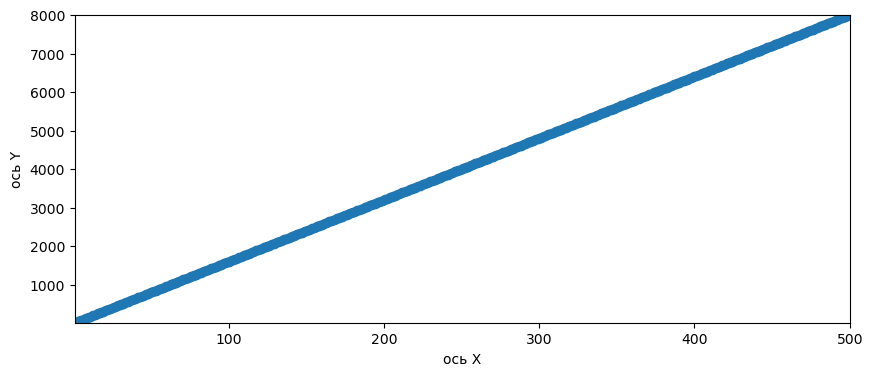

In [89]:
plt.figure(figsize=(10, 4))
plt.scatter(table.X, table.Y)  # Модель очень линейная!
plt.xlabel('ось X')  # подписываем оси
plt.ylabel('ось Y')
plt.xlim(1, 500)  # ограничения на отображение по осям
plt.ylim(21, 8006)

In [90]:
table.describe()

,X,Y
count,500.000000,500.000000
mean,250.500000,4013.487580
std,144.481833,2311.710825
min,1.000000,21.563676
25%,125.750000,2017.147450
50%,250.500000,4013.754065
75%,375.250000,6009.347773
max,500.000000,8005.481824


In [91]:
model = LinearRegression()

In [92]:
X = table.X  # берём наши Series отдельно
Y = table.Y

In [93]:
X, Y

(0        1.0
 1        2.0
 2        3.0
 3        4.0
 4        5.0
        ...  
 495    496.0
 496    497.0
 497    498.0
 498    499.0
 499    500.0
 Name: X, Length: 500, dtype: float64,
 0        21.563676
 1        37.527773
 2        53.126102
 3        69.726329
 4        85.617036
           ...     
 495    7941.166818
 496    7957.488544
 497    7973.385387
 498    7989.426458
 499    8005.481824
 Name: Y, Length: 500, dtype: float64)

In [97]:
model.fit(X, Y)

ValueError: Expected 2D array, got 1D array instead:
array=[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196.
 197. 198. 199. 200. 201. 202. 203. 204. 205. 206. 207. 208. 209. 210.
 211. 212. 213. 214. 215. 216. 217. 218. 219. 220. 221. 222. 223. 224.
 225. 226. 227. 228. 229. 230. 231. 232. 233. 234. 235. 236. 237. 238.
 239. 240. 241. 242. 243. 244. 245. 246. 247. 248. 249. 250. 251. 252.
 253. 254. 255. 256. 257. 258. 259. 260. 261. 262. 263. 264. 265. 266.
 267. 268. 269. 270. 271. 272. 273. 274. 275. 276. 277. 278. 279. 280.
 281. 282. 283. 284. 285. 286. 287. 288. 289. 290. 291. 292. 293. 294.
 295. 296. 297. 298. 299. 300. 301. 302. 303. 304. 305. 306. 307. 308.
 309. 310. 311. 312. 313. 314. 315. 316. 317. 318. 319. 320. 321. 322.
 323. 324. 325. 326. 327. 328. 329. 330. 331. 332. 333. 334. 335. 336.
 337. 338. 339. 340. 341. 342. 343. 344. 345. 346. 347. 348. 349. 350.
 351. 352. 353. 354. 355. 356. 357. 358. 359. 360. 361. 362. 363. 364.
 365. 366. 367. 368. 369. 370. 371. 372. 373. 374. 375. 376. 377. 378.
 379. 380. 381. 382. 383. 384. 385. 386. 387. 388. 389. 390. 391. 392.
 393. 394. 395. 396. 397. 398. 399. 400. 401. 402. 403. 404. 405. 406.
 407. 408. 409. 410. 411. 412. 413. 414. 415. 416. 417. 418. 419. 420.
 421. 422. 423. 424. 425. 426. 427. 428. 429. 430. 431. 432. 433. 434.
 435. 436. 437. 438. 439. 440. 441. 442. 443. 444. 445. 446. 447. 448.
 449. 450. 451. 452. 453. 454. 455. 456. 457. 458. 459. 460. 461. 462.
 463. 464. 465. 466. 467. 468. 469. 470. 471. 472. 473. 474. 475. 476.
 477. 478. 479. 480. 481. 482. 483. 484. 485. 486. 487. 488. 489. 490.
 491. 492. 493. 494. 495. 496. 497. 498. 499. 500.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.